## Observations and Insights 

From the data, I can infer that the drug regimen Capomulin is fairly successful in shrinking the tumor size of the mice. Capomulin also had the most data, and the gender of the mice did not play much of a role in the study since the number of each were pretty even.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse_id = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_mouse_id 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#create the index for the mouse to be deleted
dupemouse = merged_df[ merged_df['Mouse ID'] == "g989" ].index
# Delete these row indexes from dataFrame
merged_df.drop(dupemouse, inplace=True)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(merged_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

merged_df["Tumor Volume (mm3)"].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

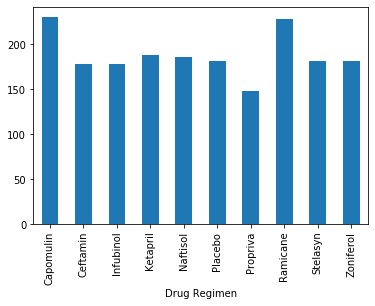

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
merged_df.groupby("Drug Regimen")['Mouse ID'].count().plot(kind='bar')


In [10]:
data = merged_df.groupby("Drug Regimen")['Mouse ID'].count()
data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [67]:
x_axis = ["Capomulin","Ceftamin","Infubinol", "Ketapril","Naftisol","Placebo",
         "Propriva","Ramicane","Stelasyn","Zoniferol"]
y_axis = [230,178,178,188,186,181,160,228,181,182]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

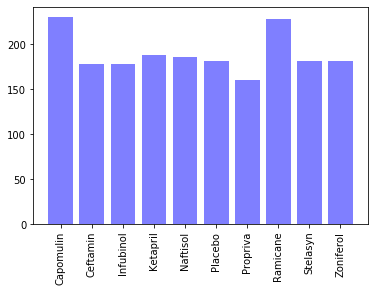

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")

In [17]:
# group by gender
gender_group = merged_df.groupby ("Sex")
gender_count = gender_group ["Sex"].count()
gender_count

Sex
Female    922
Male      958
Name: Sex, dtype: int64

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["red","lightskyblue"]

# Tells matplotlib to seperate the sections
explode = (0, 0)


([<matplotlib.patches.Wedge at 0x2784a1be3c8>,
 [Text(-0.681404241901343, -0.8635324308437154, 'Males'),
  Text(0.6814042419013431, 0.8635324308437154, 'Females')],
 [Text(-0.3716750410370961, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

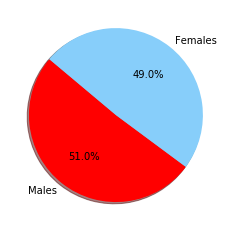

In [22]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

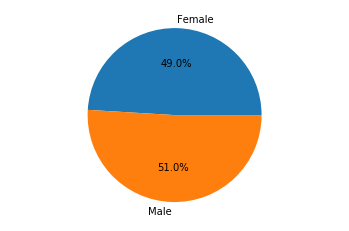

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame({
    'Sex': ['Female', "Male"],
    'Total': [922, 958]})
sums = gender_df.Total.groupby(gender_df.Sex).sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index,autopct='%1.1f%%');
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
RegTimepoint_df = merged_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
RegTimepoint_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [54]:
mergedmaxTimepoint_df = pd.merge(merged_df, RegTimepoint_df)
mergedmaxTimepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume = []


for regimen in regimens:
    final_vol = mergedmaxTimepoint_df.loc[mergedmaxTimepoint_df["Drug Regimen"]== regimen, "Tumor Volume (mm3)"]
    volume.append(final_vol)
volume

    

[1      23.343598
 2      28.484033
 3      28.430964
 6      30.485985
 10     31.023923
 12     31.896238
 13     32.377357
 14     33.329098
 16     34.455298
 20     37.311846
 22     36.041047
 24     37.074024
 28     38.846876
 30     38.939633
 31     38.982878
 32     38.753265
 34     38.125164
 35     39.952347
 36     40.658124
 37     40.159220
 38     40.728578
 39     41.483008
 40     41.581521
 45     47.685963
 180    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 49     67.973419
 50     65.525743
 57

In [98]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_data = [23.343598,28.484033,28.430964,30.485985,31.023923,31.896238,32.377357,33.329098,34.455298,37.311846,36.041047,
                  37.074024,38.846876,38.939633,38.982878,38.753265,38.125164,39.952347,40.658124,40.159220,40.728578,41.483008,
                  41.581521,47.685963,46.539206]
Capomulin_data_sorted = sorted(Capomulin_data)
Capomulin_dataQ1 = np.percentile(Capomulin_data_sorted, 25, interpolation = 'midpoint')  
Capomulin_dataQ2 = np.percentile(Capomulin_data_sorted, 50, interpolation = 'midpoint')  
Capomulin_dataQ3 = np.percentile(Capomulin_data_sorted, 75, interpolation = 'midpoint')  
  
print('Capomulin_data Q1 is ', Capomulin_dataQ1) 
print('Capomulin_data Q2 is ', Capomulin_dataQ2) 
print('Capomulin_data Q3 is ', Capomulin_dataQ3) 
  
Capomulin_dataIQR = Capomulin_dataQ3 - Capomulin_dataQ1  
print('Capomulin_data IQR is', Capomulin_dataIQR)

Capomulin_low_lim = Capomulin_dataQ1 - 1.5 * Capomulin_dataIQR 
Capomulin_up_lim = Capomulin_dataQ3 + 1.5 * Capomulin_dataIQR 
print('Capomulin_data low_limit is', Capomulin_low_lim) 
print('Capomulin_data up_limit is', Capomulin_up_lim)

Capomulin_data_outlier =[] 
for x in Capomulin_data_sorted: 
    if ((x> Capomulin_up_lim) or (x<Capomulin_low_lim)): 
         Capomulin_data_outlier.append(x) 
print('Capomulin_data outlier in the dataset is', Capomulin_data_outlier)

Ramicane_data = [22.050126,29.128472,30.276232,30.564625,30.638696,31.560470,31.095335,33.397653,32.978522,33.562402,36.134852,
                 38.810366,37.225650,36.374510,36.561652,37.311236,38.342008,38.407618,40.659006,40.667713,45.220869,43.047543,
                 43.419381,43.166373,44.183451]
Ramicane_data_sorted = sorted(Ramicane_data)
Ramicane_dataQ1 = np.percentile(Ramicane_data_sorted, 25, interpolation = 'midpoint')  
Ramicane_dataQ2 = np.percentile(Ramicane_data_sorted, 50, interpolation = 'midpoint')  
Ramicane_dataQ3 = np.percentile(Ramicane_data_sorted, 75, interpolation = 'midpoint')  
  
print('Ramicane_data Q1 is ', Ramicane_dataQ1) 
print('Ramicane_data Q2 is ', Ramicane_dataQ2) 
print('Ramicane_data Q3 is ', Ramicane_dataQ3) 
  
Ramicane_dataIQR = Ramicane_dataQ3 - Ramicane_dataQ1  
print('Ramicane_data IQR is', Ramicane_dataIQR)

Ramicane_low_lim = Ramicane_dataQ1 - 1.5 * Ramicane_dataIQR 
Ramicane_up_lim = Ramicane_dataQ3 + 1.5 * Ramicane_dataIQR 
print('Ramicane_data low_limit is', Ramicane_low_lim) 
print('Ramicane_data up_limit is', Ramicane_up_lim)

Ramicane_data_outlier =[] 
for y in Ramicane_data_sorted: 
    if ((y> Ramicane_up_lim) or (y<Ramicane_low_lim)): 
         Ramicane_data_outlier.append(y) 
print('Ramicane_data outlier in the dataset is', Ramicane_data_outlier)

Infubinol_data = [67.973419,65.525743,57.031862,66.083066,72.226731,36.321346,60.969711,62.435404,60.918767,67.289621,66.196912,
                  62.117279,47.010364,60.165180,55.629428,45.699331,54.656549,55.650681,46.250112,54.048608,51.542431,50.005138,
                  58.268442,67.685569,62.754451]
Infubinol_data_sorted = sorted(Infubinol_data)
Infubinol_dataQ1 = np.percentile(Infubinol_data_sorted, 25, interpolation = 'midpoint')  
Infubinol_dataQ2 = np.percentile(Infubinol_data_sorted, 50, interpolation = 'midpoint')  
Infubinol_dataQ3 = np.percentile(Infubinol_data_sorted, 75, interpolation = 'midpoint')  
  
print('Infubinol_data Q1 is ', Infubinol_dataQ1) 
print('Infubinol_data Q2 is ', Infubinol_dataQ2) 
print('Infubinol_data Q3 is ', Infubinol_dataQ3) 
  
Infubinol_dataIQR = Infubinol_dataQ3 - Infubinol_dataQ1  
print('Infubinol_data IQR is', Infubinol_dataIQR)

Infubinol_low_lim = Infubinol_dataQ1 - 1.5 * Infubinol_dataIQR 
Infubinol_up_lim = Infubinol_dataQ3 + 1.5 * Infubinol_dataIQR 
print('Infubinol_data low_limit is', Infubinol_low_lim) 
print('Infubinol_data up_limit is', Infubinol_up_lim)

Infubinol_data_outlier =[] 
for z in Infubinol_data_sorted: 
    if ((z> Infubinol_up_lim) or (z<Infubinol_low_lim)): 
         Infubinol_data_outlier.append(z) 
print('Infubinol_data outlier in the dataset is', Infubinol_data_outlier)

Ceftamin_data = [62.999356,45.000000,56.057749,55.742829,48.722078,47.784682,61.849023,68.923185,67.748662,57.918381,46.784535,
                 59.851956,64.299830,59.741901,61.433892,64.192341,45.000000,52.925348,45.000000,67.527482,45.000000,64.634949,
                 61.386660,68.594745,64.729837]
Ceftamin_data_sorted = sorted(Ceftamin_data)
Ceftamin_dataQ1 = np.percentile(Ceftamin_data_sorted, 25, interpolation = 'midpoint')  
Ceftamin_dataQ2 = np.percentile(Ceftamin_data_sorted, 50, interpolation = 'midpoint')  
Ceftamin_dataQ3 = np.percentile(Ceftamin_data_sorted, 75, interpolation = 'midpoint')  
  
print('Ceftamin_data Q1 is ', Ceftamin_dataQ1) 
print('Ceftamin_data Q2 is ', Ceftamin_dataQ2) 
print('Ceftamin_data Q3 is ', Ceftamin_dataQ3) 
  
Ceftamin_dataIQR = Ceftamin_dataQ3 - Ceftamin_dataQ1  
print('Ceftamin_data IQR is', Ceftamin_dataIQR)

Ceftamin_low_lim = Ceftamin_dataQ1 - 1.5 * Ceftamin_dataIQR 
Ceftamin_up_lim = Ceftamin_dataQ3 + 1.5 * Ceftamin_dataIQR 
print('Ceftamin_data low_limit is', Ceftamin_low_lim) 
print('Ceftamin_data up_limit is', Ceftamin_up_lim)

Ceftamin_data_outlier =[] 
for q in Ceftamin_data_sorted: 
    if ((q> Ceftamin_up_lim) or (q<Ceftamin_low_lim)): 
         Ceftamin_data_outlier.append(q) 
print('Ceftamin_data outlier in the dataset is', Ceftamin_data_outlier)
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    # add subset 
        
    # Determine outliers using upper and lower bounds


Capomulin_data Q1 is  32.377357
Capomulin_data Q2 is  38.125164
Capomulin_data Q3 is  40.15922
Capomulin_data IQR is 7.781862999999994
Capomulin_data low_limit is 20.704562500000012
Capomulin_data up_limit is 51.832014499999985
Capomulin_data outlier in the dataset is []
Ramicane_data Q1 is  31.56047
Ramicane_data Q2 is  36.561652
Ramicane_data Q3 is  40.659006
Ramicane_data IQR is 9.098536
Ramicane_data low_limit is 17.912666
Ramicane_data up_limit is 54.30681
Ramicane_data outlier in the dataset is []
Infubinol_data Q1 is  54.048608
Infubinol_data Q2 is  60.16518
Infubinol_data Q3 is  65.525743
Infubinol_data IQR is 11.477135000000004
Infubinol_data low_limit is 36.832905499999995
Infubinol_data up_limit is 82.74144550000001
Infubinol_data outlier in the dataset is [36.321346]
Ceftamin_data Q1 is  48.722078
Ceftamin_data Q2 is  59.851956
Ceftamin_data Q3 is  64.29983
Ceftamin_data IQR is 15.577751999999997
Ceftamin_data low_limit is 25.35545000000001
Ceftamin_data up_limit is 87.6664

{'whiskers': [<matplotlib.lines.Line2D at 0x2784b51e808>,
 'caps': [<matplotlib.lines.Line2D at 0x2784b51ee88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2784b517f88>,
 'medians': [<matplotlib.lines.Line2D at 0x2784b525e08>,
 'fliers': [<matplotlib.lines.Line2D at 0x2784b525f08>,
 'means': []}

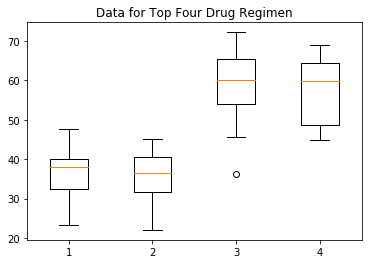

In [97]:
# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
AllData = [Capomulin_data_sorted, Ramicane_data_sorted, Infubinol_data_sorted, Ceftamin_data_sorted]
fig1, ax1 = plt.subplots()
ax1.set_title('Data for Top Four Drug Regimen')
ax1.boxplot(AllData)

## Line and Scatter Plots

In [99]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
merged_df.loc[merged_df["Mouse ID"] == "x401"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


Text(0, 0.5, 'Tumor Volume (mm3)')

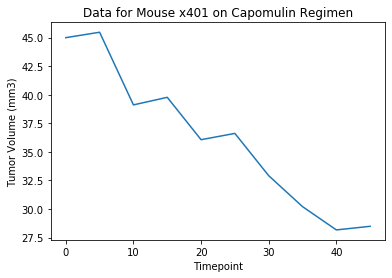

In [101]:
# Set x axis and variables
timepoint = [0, 5,10,15,20,25,30,35,40,45]
tumor_vol = [45.000000,45.473753,39.113891,39.776250,36.065835,36.617120,32.915292,30.206825,28.167397,28.484033]
plt.plot (timepoint,tumor_vol)
plt.title ("Data for Mouse x401 on Capomulin Regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [103]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_complete_data = merged_df[merged_df["Drug Regimen"] == "Capomulin"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [107]:
capomulinGroup = capomulin_complete_data.groupby("Mouse ID").mean()
capomulinGroup

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


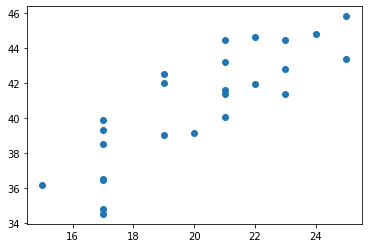

In [108]:
plt.scatter(capomulinGroup['Weight (g)'],capomulinGroup["Tumor Volume (mm3)"] )
    

## Correlation and Regression

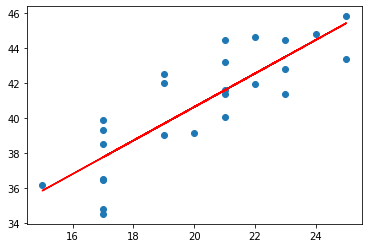

In [109]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulinGroup['Weight (g)'],capomulinGroup["Tumor Volume (mm3)"])
correlation[0]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinGroup['Weight (g)'],capomulinGroup["Tumor Volume (mm3)"])
regress_values = capomulinGroup['Weight (g)'] * slope + intercept
plt.scatter(capomulinGroup['Weight (g)'],capomulinGroup["Tumor Volume (mm3)"] )
plt.plot(capomulinGroup['Weight (g)'],regress_values,"r-")